<a href="https://colab.research.google.com/github/VishalC02/Machine-Learning/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Steps
#1.Preprocess + EDA+feature selection
#2.Extract input and output cols
#3.Scale the values
#4.Train test split
#5.Train the model
#6.Evaluate the model/model selection
#7.deploy the model

In [2]:
import numpy as np
import pandas as pd

In [16]:
df=pd.read_csv('/content/placement.csv')

In [17]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [19]:
df.iloc[:,1:]

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [20]:
import matplotlib.pyplot as plt

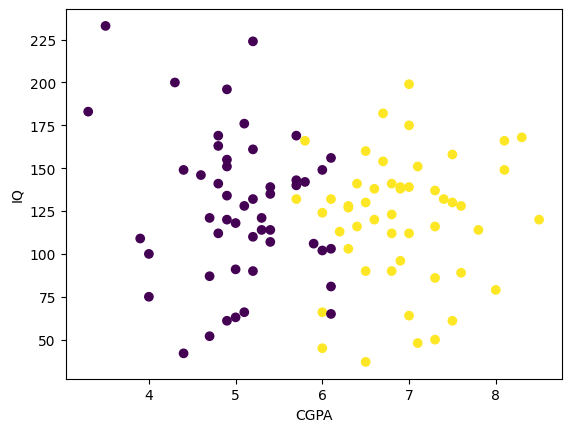

In [23]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.show()

In [24]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [26]:
X

,Unnamed: 0,cgpa
0,0,6.8
1,1,5.9
2,2,5.3
3,3,7.4
4,4,5.8
...,...,...
95,95,4.3
96,96,4.4
97,97,6.7
98,98,6.3


In [28]:
y.shape

(100,)

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [37]:
X_train

,Unnamed: 0,cgpa
56,56,6.1
66,66,6.9
71,71,6.1
79,79,6.5
87,87,5.7
...,...,...
46,46,5.3
45,45,6.0
38,38,6.5
75,75,4.8


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler=StandardScaler()

In [42]:
X_train=scaler.fit_transform(X_train)

In [41]:
X_test=scaler.transform(X_test)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
clf=LogisticRegression()

In [47]:
#model train
clf.fit(X_train,y_train)

LogisticRegression()

In [52]:
y_pred=clf.predict(X_test)

In [53]:
y_test

13    1
17    0
21    1
52    1
44    1
6     0
48    1
92    0
91    1
14    0
Name: placement, dtype: int64

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_test,y_pred)

1.0

In [56]:
from mlxtend.plotting import plot_decision_regions

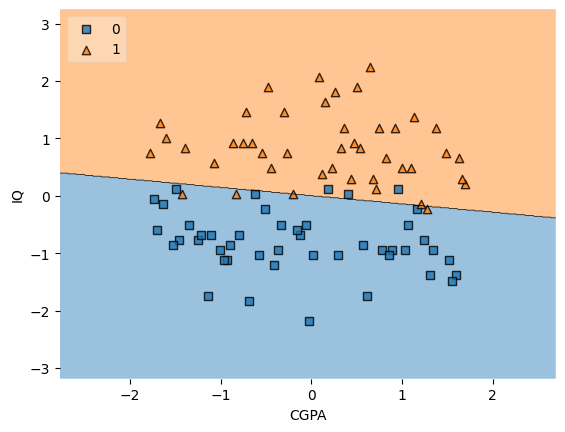

In [57]:
plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.show()

In [58]:
import pickle

In [59]:
pickle.dump(clf,open('model.pkl','wb'))